### Columns Dictionary

        RowNumber: Row number
        
        CustomerID: Customer ID
        
        Surname: Surname
        
        CreditScore: The customer's Credit score for the consumer market
        
        Geography: The country where the customer lives
        
        Gender: Gender
        
        Age: Age
        
        Tenure: How many years has the customer been a bank customer
        
        Balance: Monetary value that the customer has in his bank account
        
        NumOfProducts: The number of products purchased by the customer at the bank
        
        HasCrCard: Indicates whether the customer has a credit card or not.
        
        IsActiveMember: Indicates whether the customer made at least one transaction
                        in the bank account within 12 months.
                        
        EstimateSalary: Estimated Annual Salary
        
        Exited: Indicates whether the customer is in Churn or not.


## Agenda
    0.0 Imports
        0.1 Helper Functions
        0.2 Loading Data
    1.0 Describe Data
        1.1 Rename Columns
        1.2 Descriptive Statistical
            1.2.1. Numerical Attributes
            1.2.2. Categorical Attributes
    2.0 Hypotheses Creation
        Hypotheses
    3.0 Feature Engineering
        3.1 Annual Revenue
        3.2 Revenue per Product
        3.3 Actual Revenue
    4.0 Filtering The Features
        4.1 Column Selection
    5.0 Exploratory Data Analysis
        5.1 Univariate Analysis
            5.1.1. Response Variable
        5.2 Bivariate Analysis
            Insights \(*O*)/
        5.3 Multivariate Analysis
            5.3.1. Numerical Attributes
            5.3.2. Categorical Attributes

### 0.0 Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# util
import inflection
from IPython.display import Image
from scipy import stats

### 0.1 Helper Functions

In [2]:
# Just so I can remember their meaning throughtout the analysis
def describe_columns():
    columns_explanation = '''
            RowNumber: O número da coluna\n
            CustomerID: Identificador único do cliente\n
            Surname: Sobrenome do cliente.\n
            CreditScore: A pontuação de Crédito do cliente para o mercado de consumo.\n
            Geography: O país onde o cliente reside.\n
            Gender: O gênero do cliente.\n
            Age: A idade do cliente.\n
            Tenure: Número de anos que o cliente permaneceu ativo.\n
            Balance: Valor monetário que o cliente tem em sua conta bancária.\n
            NumOfProducts: O número de produtos comprado pelo cliente no banco.\n
            HasCrCard: Indica se o cliente possui ou não cartão de crédito.\n
            IsActiveMember: Indica se o cliente fez pelo menos uma movimentação na conta bancário dentro de 12 meses.\n
            EstimateSalary: Estimativa do salário anual do cliente.\n
            Exited: Indica se o cliente está ou não em Churn.\n'''
    print(columns_explanation)

    
def describe_data(data):
    print(f"Shape: {data.shape}")
    print(f"Duplicates: {data.duplicated().any()}")
    
    is_na = data.isna().sum()
    is_na_percentage = data.isna().sum()/data.shape[0]*100
    nan_data_frame = pd.concat([data.dtypes, is_na, is_na_percentage], axis=1)
    nan_data_frame.columns = ['data_types', 'nan_count', 'nan_percentage']
    #display(nan_data_frame)
    return nan_data_frame
    
    
# 5.1.3. Categorical Variables    
def get_categories(data):
    df = pd.DataFrame()
    for column in data.columns:
        col = pd.Series(data[column].unique(), name=column)
        df = pd.concat([df, col], axis=1).fillna('')
    return df


# 5.3 Multivariate Analysis 
#  5.3.2. Categorical Attributes
def cramer_v( x, y ):
    confusion_matrix = pd.crosstab( x, y ).to_numpy() 
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    
    chi2 = stats.chi2_contingency( confusion_matrix )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

def get_categorical_corr(categorical_data):
    categorical_correlation_matrix = {}

    for column in categorical_data.columns:
        correlation_values = []
        for col in categorical_data.columns:
            correlation_values.append(cramer_v(categorical_attributes[column], categorical_attributes[col]))

        categorical_correlation_matrix[column] = correlation_values
    
    categorical_corr = pd.DataFrame(categorical_correlation_matrix)
    categorical_corr = categorical_corr.set_index( categorical_corr.columns )
    return categorical_corr

### 0.2 Loading Data

In [4]:
raw_data = pd.read_csv("churn.csv")
raw_data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


## 1.0 Describe Data

In [3]:
data = raw_data.copy()

### 1.1 Rename Columns

In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
old_columns = data.columns

# transform snakecase with inflection
snakecase = lambda x: inflection.underscore(x)
new_columns = map(snakecase, old_columns)

data.columns = new_columns
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [10]:
data.to_csv("churn_data.csv", index=False) # I'll use it way later in the web app

> **0 missing values and also no duplicates.** It's a good start.

In [8]:
describe_data(data)

Shape: (10000, 14)
Duplicates: False


,data_types,nan_count,nan_percentage
row_number,int64,0,0.0
customer_id,int64,0,0.0
surname,object,0,0.0
credit_score,int64,0,0.0
geography,object,0,0.0
gender,object,0,0.0
age,int64,0,0.0
tenure,int64,0,0.0
balance,float64,0,0.0
num_of_products,int64,0,0.0


### 1.2 Descriptive Statistical

In [9]:
numerical_attributes = data.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = data.select_dtypes( exclude=['int64', 'float64'] )

#### 1.2.1. Numerical Attributes

From here We already know that
    
> **20% of customers are in churn.**
>
> Half of customers are active members.
>
> 70% has credit card.
> 

    And the minimum salary seems too low (we'll check it out later).
   

In [10]:
skew = pd.DataFrame(numerical_attributes.apply(lambda x: x.skew()), columns=['skew']).T
kurtosis = pd.DataFrame(numerical_attributes.apply(lambda x: x.kurtosis()), columns=['kurtosis']).T
stats = pd.concat([data.describe(), skew, kurtosis]).T

def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)
    df.iloc[8, 0] = df.iloc[7, 0] = df.iloc[-1, 0] = 'background-color: lightgreen'
    df.iloc[-2, 2] = 'background-color: red'
    return df

stats.drop(columns='count').style.apply(style_specific_cell, axis=None).format("{:.2f}")

,mean,std,min,25%,50%,75%,max,skew,kurtosis
row_number,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00,0.00,-1.20
customer_id,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00,0.00,-1.20
credit_score,650.53,96.65,350.00,584.00,652.00,718.00,850.00,-0.07,-0.43
age,38.92,10.49,18.00,32.00,37.00,44.00,92.00,1.01,1.40
tenure,5.01,2.89,0.00,3.00,5.00,7.00,10.00,0.01,-1.17
balance,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09,-0.14,-1.49
num_of_products,1.53,0.58,1.00,1.00,1.00,2.00,4.00,0.75,0.58
has_cr_card,0.71,0.46,0.00,0.00,1.00,1.00,1.00,-0.90,-1.19
is_active_member,0.52,0.50,0.00,0.00,1.00,1.00,1.00,-0.06,-2.00
estimated_salary,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48,0.00,-1.18


#### 1.2.2. Categorical Attributes

In [11]:
categorical_attributes.apply( lambda x: x.unique().shape[0] )

surname      2932
geography       3
gender          2
dtype: int64

        So far, boxplots are pretty similar and the one which gets my attention is the "balance" one.
        Even though the salaries among the countries are quite similar, people in Germany, in general,
        has a greater balance account. Does it mean a better financial education? Anyways, it might 
        also mean that by losing a customer from Germany there's a high chance of losing a good customer.

In [12]:
numerical_attributes.columns

Index(['row_number', 'customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

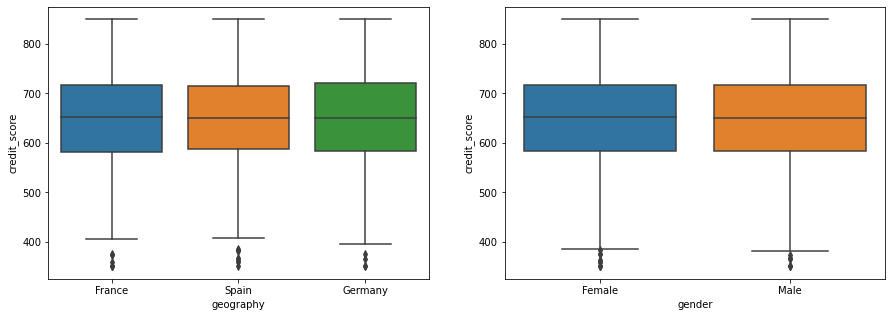

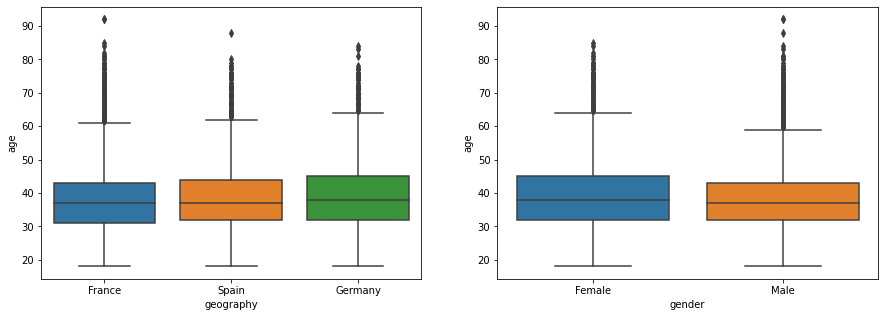

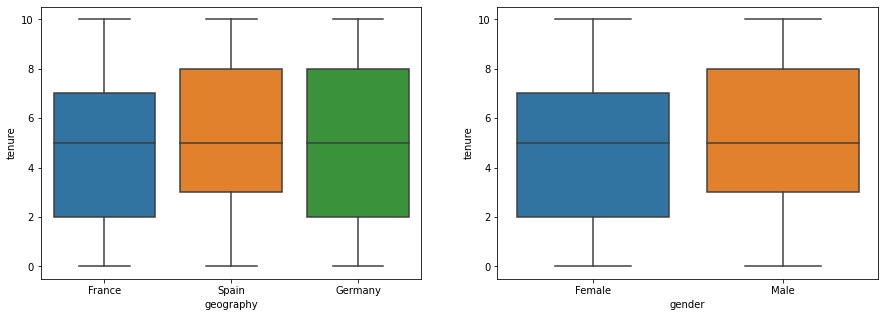

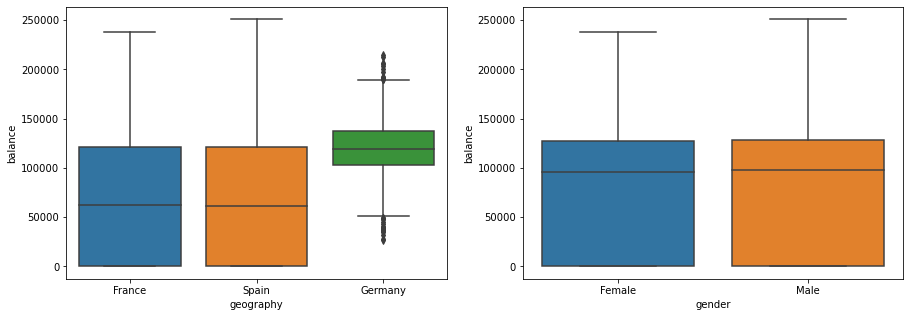

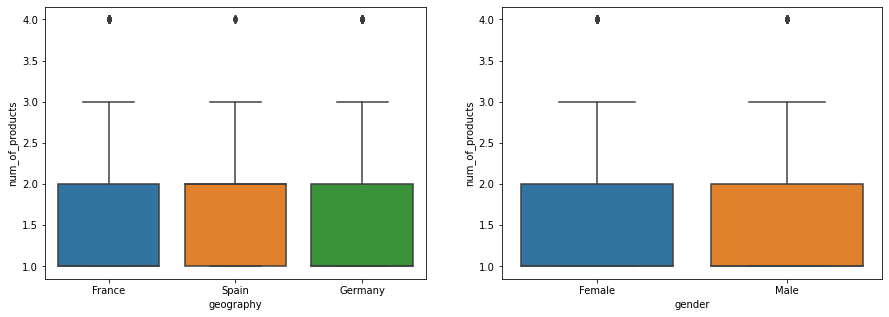

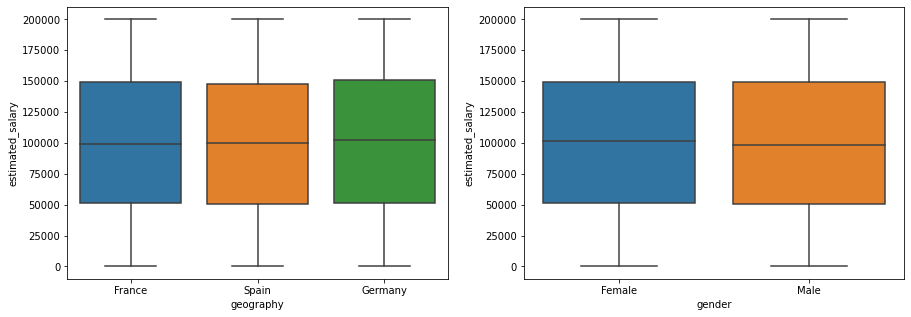

In [13]:
numerical_attributes_list = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

for attribute in numerical_attributes_list:
    plt.figure(figsize=(15,5))
    plt.subplot( 1, 2, 1 )
    sns.boxplot( x='geography', y = attribute, data=data )

    plt.subplot( 1, 2, 2 )
    sns.boxplot( x='gender', y = attribute, data=data )
    
    print("\n\n"); plt.show()

## 2.0 Hypotheses Creation

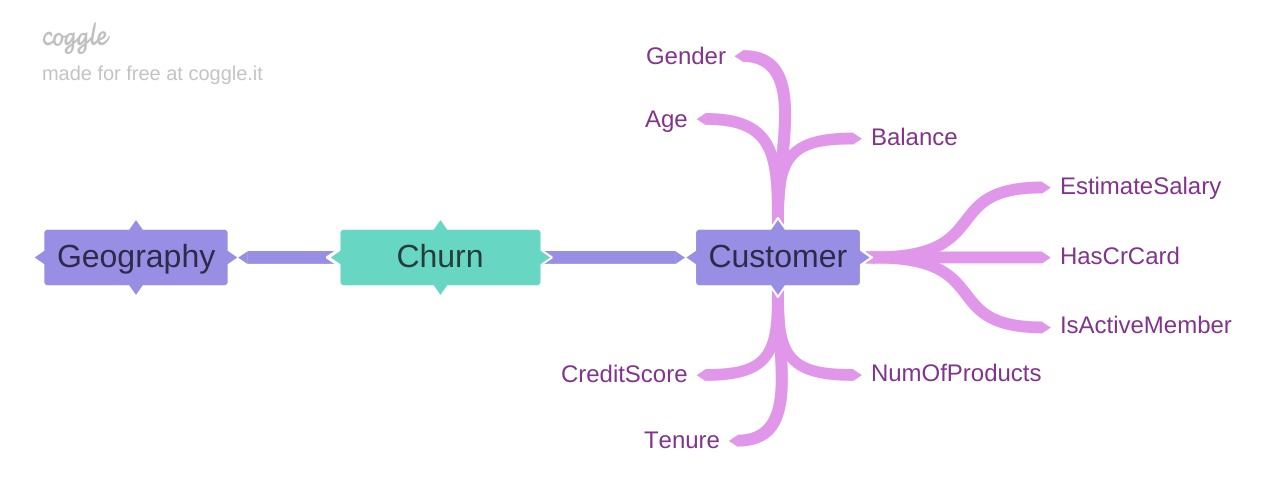

In [13]:
Image( 'hypotheses mind map.png' )

### 2.1 Hypotheses

#### 2.1.1. Customer hypotheses.

**1.** Younger customers have higher churn rate.
        
        Which age brings more revenue?

**2.** Higher balance customers have lower turnover rate.

        Does higher balance mean more revenue?

**3.** Customers with higer salaries have lower churn rate.

        Does higher salary mean more revenue?

**4.** Customers who are active members have lower churn rate.

        How much do we earn from active members?

**5.** Customers who buy more products have lower churn rate.

        Who brings us more revenue from those?

**6.** "Older" customers have lower churn rate.

        The longer the time, greater is the revenue?

**7.** Customers with credit card have a lower churn rate.

        Are they the most responsible for revenue?

**8.** Customers with higher credit score have lower churn rate.

        Does a higher credit score mean more revenue?

#### 2.1.3. Geography hypotheses.

        Which country does the biggest revenue come from?

**1.** Country that has more customers on "active members group" has lower churn rate.

**2.** Country with higher average credit score has lower churn rate.

**3.** Country with higher sum of balances have lower churn rate.

**4.** Country with higher average balance have lower churn rate.

**5.** Country with higher average salary has lower churn rate.

**6.** Country with more credit card customers has lower churn rate.

## 3.0 Feature Engineering

In [14]:
data.head(2)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [15]:
# symmetrical distribution - we'll use the mean
print( round(data['estimated_salary'].mean(),2), data['estimated_salary'].median() )

100090.24 100193.915


### 3.1 Annual Revenue

    How much do TopBank expect to gain from this customer? 

**_According to the TopBank Analytics team, each customer who has this bank account returns a monetary value of 15% of the value of their estimated salary, if it is less than the average and 20% if this salary is higher than the average, during the current period of your account. This value is calculated annually._**

Let's calculate the annual revenue, then.

In [16]:
mean_salary = data['estimated_salary'].mean()
TWELVE_MONTHS = 12

data['annual_revenue'] = [(salary/TWELVE_MONTHS)*0.2 if salary > mean_salary else (salary/TWELVE_MONTHS)*0.15 
                           for salary in data['estimated_salary']]

### 3.2 Revenue per Product

    Would it be "How much is this customer paying for each product?"?
    Not quite, but since we don't have this specific data, let's use 
    it as an alternative.

In [17]:
data['revenue_per_product'] = data['annual_revenue'] / data['num_of_products']

### 3.3 Total Revenue

    How much did TopBank earn with this customer until today?

In [18]:
data['total_revenue'] = [tenure*annual_earning if tenure > 0 else annual_earning
                         for tenure, annual_earning in zip(data['tenure'], data['annual_revenue'])]

## 4.0 Filtering The Features

In [19]:
data_frame = data.copy()
data_frame.head(3)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,annual_revenue,revenue_per_product,total_revenue
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1689.148000,1689.148000,3378.296000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1875.709667,1875.709667,1875.709667
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1898.859500,632.953167,15190.876000


### 4.1 Column Selection

    These columns won't be helpful at all. They're too specific,
    We want to generalize so the solution will work for as much
    observations as we'll have.

In [20]:
drop_columns = ['row_number','customer_id','surname']
data_frame.drop(columns=drop_columns, inplace=True)

## 5.0 Exploratory Data Analysis

In [21]:
churn_data = data_frame.copy()

describe_data(churn_data)['data_types'].unique()

Shape: (10000, 14)
Duplicates: False


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [22]:
numerical_attributes = churn_data.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = churn_data.select_dtypes( exclude=['int64', 'float64'] )

### 5.1 Univariate Analysis

#### 5.1.1. Response Variable

> **_Imbalanced data. We'll have to deal with this later_**

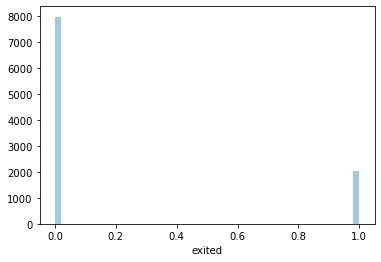

In [23]:
sns.distplot(churn_data['exited'], kde=False);

#### 5.1.2. Numerical Variables

_Some assumptions we can't tell if they're true, but if we could, those would help us to understand better what's happening and how it affects the phenomenon._

> Credit Score

    The credit score distribution kind of tends to high values (the boxplot in 1.2.2.Categorical Attributes
    shows that too, but to really validate this We should talk to an expert from TopBank, then We could know
    exactly which value the company considers high). 
    
    50% of customers have a score above the mean, so when a customer leaves TopBank there's a good chance the
    company is losing a high quality customer.

> Tenure     

    "Tenures" are similar. If people are leaving at different times, it might be they're facing problems on 
    different services (we could also try to categorize by different types of customers... anyway, it's a
    whole new analysis), thus the enterprise would have to improve in more than just "some services"... As you
    can see, the histogram shows fewer people that churn in less than 1 year (0) and after 10 years (which doesn't
    make sense?), this probably happens because of the season the data started to be collected (mid-year, perhaps?)
    and when it was finally sent to analysis. Again, expertise domain from the company would really help (as well
    as more data representing other information, such as dates, products and so on).
    
> Balance 

    Similar assumption to Credit Score's. Losing a customer with high balance might be a situation we want to
    avoid. It's weird the fact that there're many accounts with 0 as balance.
    
> Number of Products

    Most of the customers consume 1 or 2 products. It would be good to ask the company which products are these
    to try to understand why this happens. Do people buy 1, 2 and then stop buying? Is it an aftersales problem?
    Or is is a normal phenomenon?
    
> Credit Card

    Most customers have credit card (70%). This can be good or bad, depending on how much the company wishes to gain
    from it (besides the "maximum gain" ideal) and depending on which metric they would use to measure that gain.
    But in general, it seems good.
    
    If customers with credit card bring higher revenue, there's also a high chance TopBank is losing good customers
    when they leave.
    
> Active Members
    
    We have an almost equal number of active and non-active members, not a very good sign if non-active members are
    the ones who leave the company in higher rates. We might want to investigate that later trying to understand why.
    
> Salary (annual_revenue, revenue_per_product, total_revenue)

    There is some quantity of salary with very low values... outliers, which affects features as
    annual_revenue, revenue_per_product and total_revenue. Those are basically telling us that most of 
    company's revenue comes from lower prices products (this might be a misinterpretation, though. Since
    we don't really know the actual prices for each product).

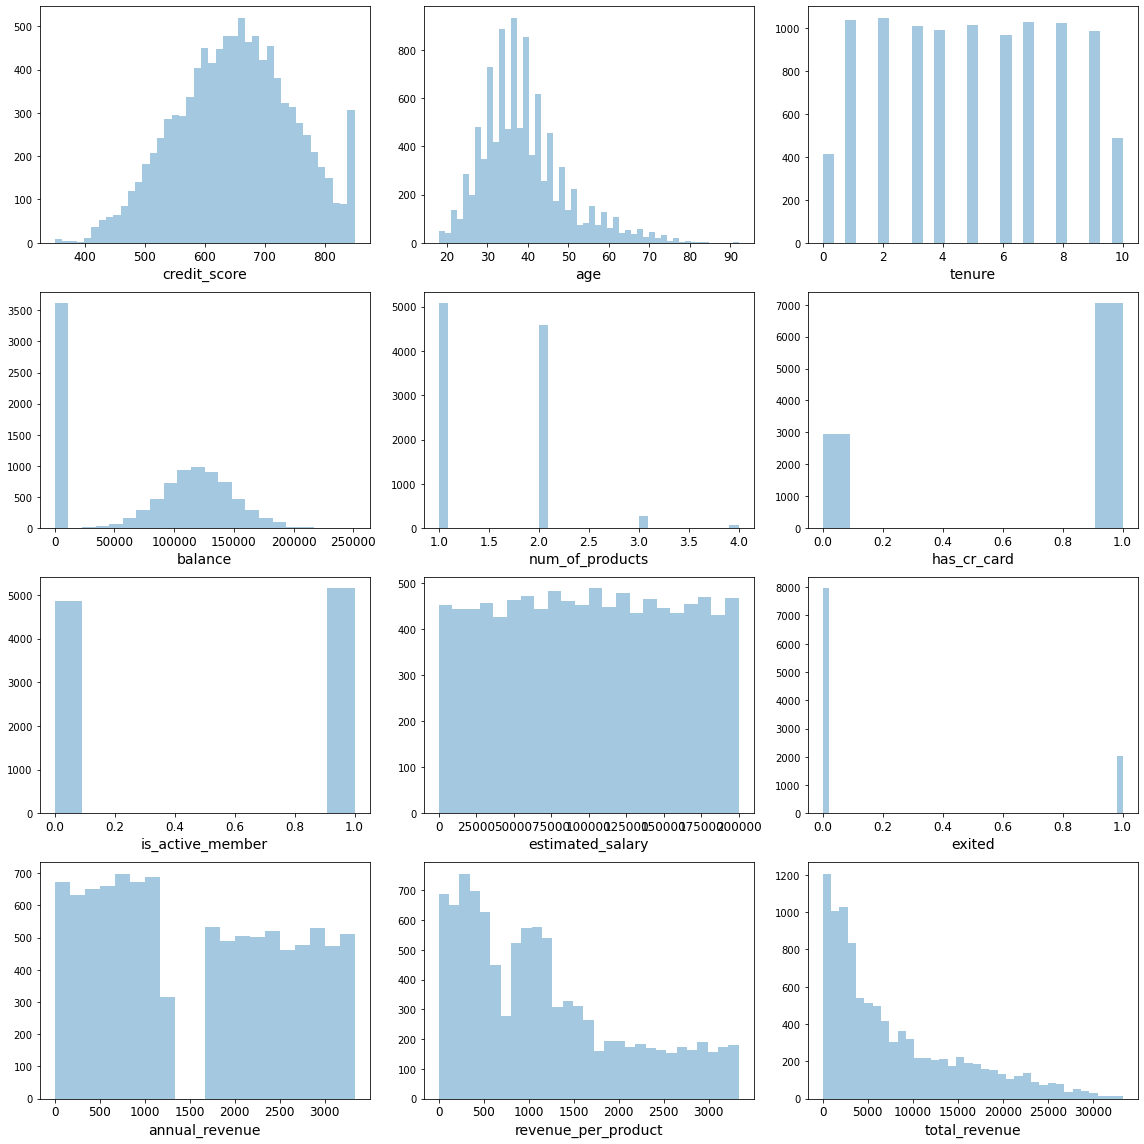

In [24]:
plt.figure(figsize=(16,16))
for column, subplot in zip(numerical_attributes, range(len(numerical_attributes))):
    plt.subplot(4, 3, subplot+1)
    sns.distplot( numerical_attributes[column], kde=False )
    plt.xlabel(column,fontsize=14); plt.xticks(fontsize=12)
plt.tight_layout()

In [25]:
total_customers = len(churn_data)

In [26]:
# Percentage of Credit score above the mean.
len(churn_data[churn_data.credit_score > churn_data.credit_score.mean()]) / total_customers

0.5063

In [27]:
# Percentage balance account above the median. I'm using the median because there are lots of accounts with 0 as balance.
# More of higher balances are good for the company, so we worry more about losing those, the median fits better, then.
len(churn_data[churn_data.balance > churn_data.balance.median()]) / total_customers

0.5

In [28]:
# Percentage of customers with credit card
len(churn_data[churn_data.has_cr_card == True]) / total_customers

0.7055

In [29]:
# Percentage of lower salary outliers
minimum_salary = 1000*12 # Spain has the minimum wage
len(churn_data[churn_data.estimated_salary < minimum_salary]) / total_customers

0.0598

In [30]:
churn_data = churn_data[churn_data['estimated_salary'] > minimum_salary]

#### 5.1.3. Categorical Variables

> Geography 

    France has twice as many customers as Germany. But Germany has twice the churn rate. This is kind of scary,
    but it may mean that TopBank should apply a different marketing plan there or those customers should receive 
    other services. As usual, communication with people with domain knowledge could guide our decisions here 
    (in case we decide to investigate deeper this event).
    
> Gender

    Even with more male data, it says females has the higher churn rates. 

In [31]:
get_categories(categorical_attributes)

,geography,gender
0,France,Female
1,Spain,Male
2,Germany,


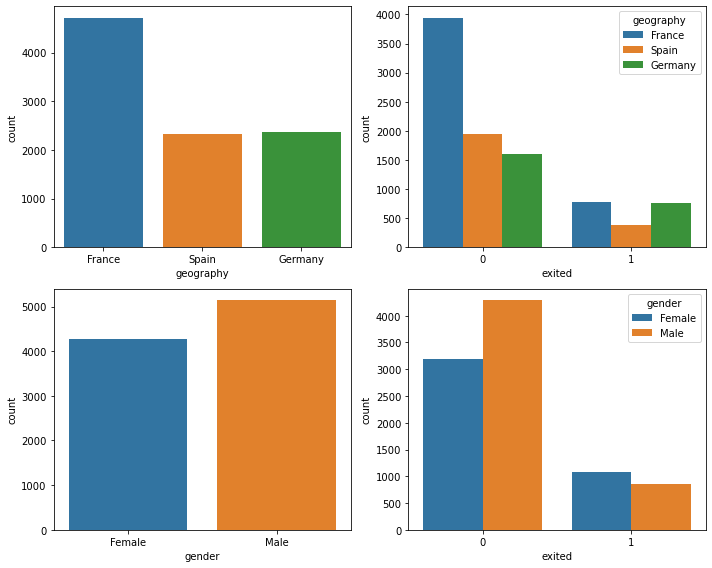

In [32]:
plt.figure(figsize=(10,8))

plt.subplot( 2, 2, 1 )
sns.countplot(churn_data['geography'])

plt.subplot( 2, 2, 2 )
sns.countplot(x='exited', hue='geography', data=churn_data)

plt.subplot( 2, 2, 3 )
sns.countplot(churn_data['gender'])

plt.subplot( 2, 2, 4 )
sns.countplot(x='exited', hue='gender', data=churn_data)

plt.tight_layout()

In [33]:
spain_data = churn_data[churn_data['geography'] == 'Spain']
france_data = churn_data[churn_data['geography'] == 'France']
germany_data = churn_data[churn_data['geography'] == 'Germany']

**_Churn Rate in each country_**

In [34]:
spain_churn = spain_data[spain_data['exited'] == True].shape[0] / spain_data.shape[0]
france_churn = france_data[france_data['exited'] == True].shape[0] / france_data.shape[0]
germany_churn = germany_data[germany_data['exited'] == True].shape[0] / germany_data.shape[0]

print(f"Spain    {round(spain_churn, 2)}.  Customers: {spain_data.shape[0]}")
print(f"France   {round(france_churn, 2)}.  Customers: {france_data.shape[0]}")
print(f"Germany  {round(germany_churn,2)}.  Customers: {germany_data.shape[0]}")

Spain    0.17.  Customers: 2327
France   0.16.  Customers: 4716
Germany  0.32.  Customers: 2359


In [35]:
female_1 = len(churn_data[(churn_data['gender'] == 'Female') & (churn_data['exited'] == True)])/total_customers
male_1 = len(churn_data[(churn_data['gender'] == 'Male') & (churn_data['exited'] == True)])/total_customers
print(f"Female Churn Rate: {female_1*100}%")
print(f"Male Churn Rate:   {male_1*100}%")
print()
female_1 = len(spain_data[(spain_data['gender'] == 'Female') & (spain_data['exited'] == True)])/ len(spain_data)
male_1 = len(spain_data[(spain_data['gender'] == 'Male') & (spain_data['exited'] == True)])/ len(spain_data)
print(f"Spain Female Churn Rate: {round(female_1*100, 2)}%")
print(f"Spain Male Churn Rate:   {round(male_1*100, 2)}%")
print()
female_1 = len(france_data[(france_data['gender'] == 'Female') & (france_data['exited'] == True)])/ len(france_data)
male_1 = len(france_data[(france_data['gender'] == 'Male') & (france_data['exited'] == True)])/ len(france_data)
print(f"France Female Churn Rate: {round(female_1*100, 2)}%")
print(f"France Male Churn Rate:   {round(male_1*100, 2)}%")
print()
female_1 = len(germany_data[(germany_data['gender'] == 'Female') & (germany_data['exited'] == True)])/ len(germany_data)
male_1 = len(germany_data[(germany_data['gender'] == 'Male') & (germany_data['exited'] == True)])/ len(germany_data)
print(f"Germany Female Churn Rate: {round(female_1*100, 2)}%")
print(f"Germany Male Churn Rate:   {round(male_1*100, 2)}%")

Female Churn Rate: 10.72%
Male Churn Rate:   8.51%

Spain Female Churn Rate: 9.5%
Spain Male Churn Rate:   7.26%

France Female Churn Rate: 9.27%
France Male Churn Rate:   7.17%

Germany Female Churn Rate: 17.55%
Germany Male Churn Rate:   14.58%


In [36]:
# Saving the progress
# churn_data.to_pickle("churn_data_EDA.pkl")
# churn_data = pd.read_pickle("churn_data_EDA.pkl")

### 5.2 Bivariate Analysis

### _Customer hypotheses._

In [36]:
df = churn_data.copy()

#### _1. Younger customers have higher churn rate._

> **No, most of churn rate comes from people of age between 38 - 52. <br>
> It means TopBank is losing people at their professional peak.** <br>
> And most of not churned customers are in between 28 - 42. Which make us think: <br>
> maybe TopBank should create new products/services... or adapt the existing ones <br>
> to better fit "older" customers.
    
**_Which age brings more revenue?_**

        40 years old - 744,891.15 EUR of annual revenue.
        37 years old - 734,320.97 EUR of annual revenue.
        38 years old - 713,875.61 EUR of annual revenue.

> Most revenue comes from customers of age between 29 - 43.   

In [51]:
# Ages with more Churned Customers
df.loc[df['exited'] == True ,'age'].value_counts().head(16).index.sort_values()

Int64Index([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], dtype='int64')

In [52]:
# Ages with more Not Churned Customers
df.loc[df['exited'] == False ,'age'].value_counts().head(16).index.sort_values()

Int64Index([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype='int64')

Categorizing age based on [career stage](https://www.amazingpeople.co.uk/career-stages/).

In [44]:
age_categories = pd.cut(churn_data['age'], range(18, 100, 7))
age_categories.name = 'age_stage'
df = pd.concat([df, age_categories], axis=1)

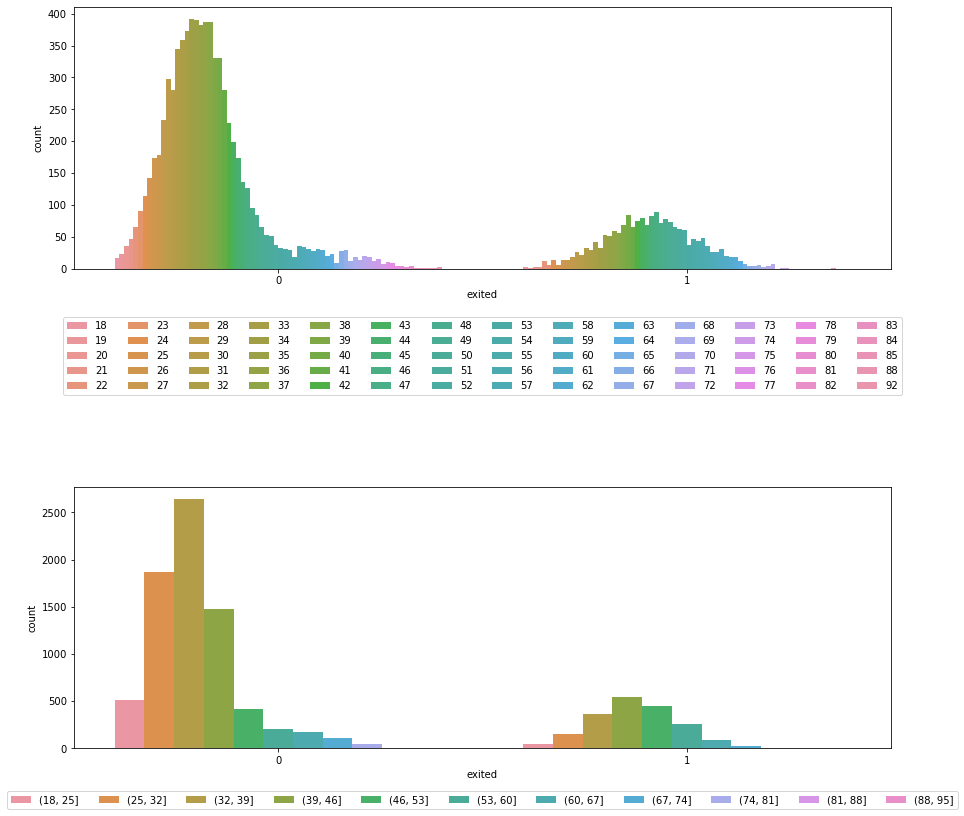

In [45]:
rows = 2; cols = 1
plt.figure(figsize=(14,12))
plt.subplot(rows, cols, 1)
sns.countplot( hue='age', x='exited', data=df)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.5), ncol=len(df.columns)-1)

plt.subplot(rows, cols, 2)
sns.countplot( hue='age_stage', x='exited', data=df)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(df.columns))

plt.subplots_adjust(bottom = -0.2)
plt.tight_layout()

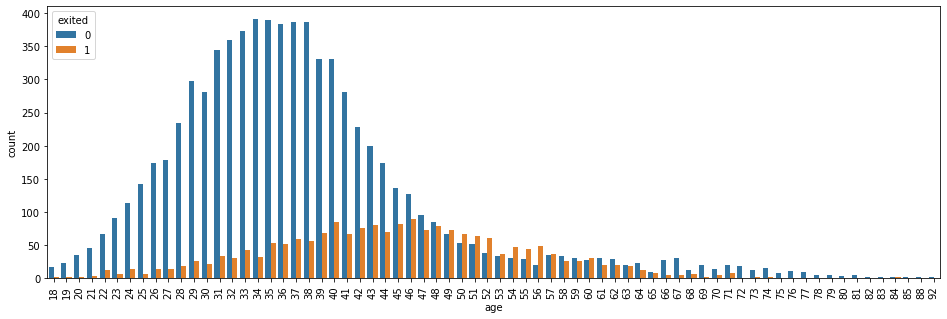

In [46]:
plt.figure(figsize=(16,5))
sns.countplot('age', hue='exited', data=df)
plt.xticks(rotation=90);

**_Which age brings more revenue?_**

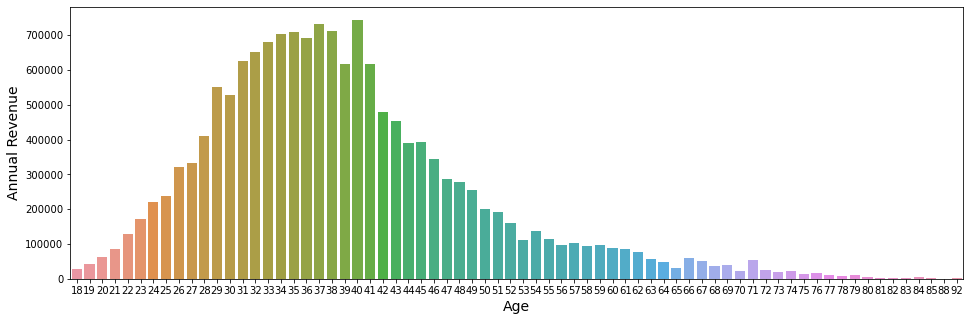

In [47]:
annual_revenue_per_age = df.groupby('age').sum()['annual_revenue']

plt.figure(figsize=(16,5))
sns.barplot( x=annual_revenue_per_age.index, y=annual_revenue_per_age);
plt.xlabel('Age', fontsize=14); plt.ylabel('Annual Revenue', fontsize=14);

In [48]:
# Ages with greater sum of revenues
annual_revenue_per_age.round(2).sort_values(ascending=False).head(15).index.sort_values()

Int64Index([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype='int64', name='age')

In [54]:
# 4.6% of revenue losses comes from Ages between [38 - 42]
exited_inner_most_revenue = [38, 39, 40 ,41 ,42, 43]
df[(df['exited'] == True) & (df['age'].isin(exited_inner_most_revenue))]['annual_revenue'].sum() / df['annual_revenue'].sum()

0.04615608867147897

In [50]:
pd.DataFrame( annual_revenue_per_age.round(2).sort_values(ascending=False).head() )

,annual_revenue
age,
40,743742.80
37,732260.17
38,711346.24
35,710036.70
34,703936.69


#### _2. Higher balance customers have lower turnover rate._
                
> Yes, but customers with lower balance also have lower churn rates, so it's not a trend, it's only a reflex of normal distributed data.


**_Does higher balance mean more revenue?_**

> No.


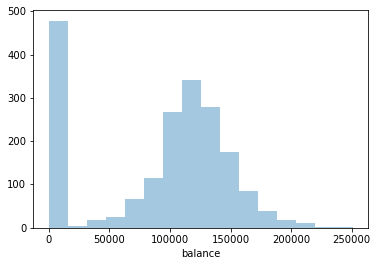

In [55]:
sns.distplot(df.loc[ df['exited'] == True , 'balance'], kde=False);

In [56]:
print('Max Balance', df['balance'].max())

Max Balance 250898.09


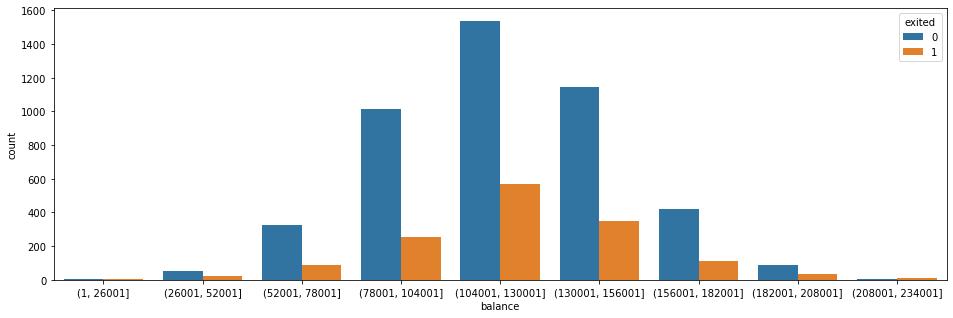

In [57]:
rounded_max_balance = 260000
ten_bins = int(rounded_max_balance/10)

balance_categories = pd.cut(churn_data['balance'], range(1, rounded_max_balance, ten_bins))

plt.figure(figsize=(16,5))
sns.countplot(balance_categories, hue=df.exited);

**_Does higher balance mean more revenue?_**

They're not [correlated](https://en.wikipedia.org/wiki/Correlation_and_dependence), so, no.

In [63]:
pd.concat([df.balance, df.annual_revenue, df.total_revenue], axis=1).corr().sample()

,balance,annual_revenue,total_revenue
balance,1.0,0.002875,-0.004725


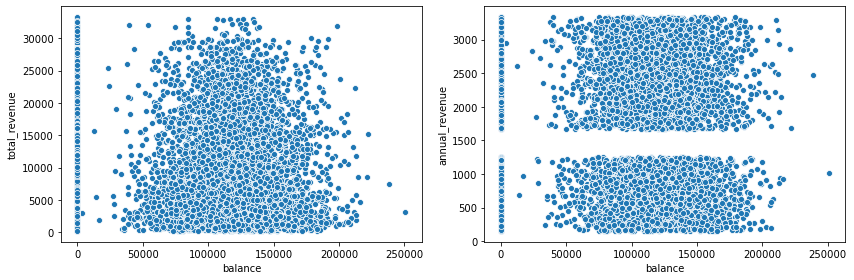

In [64]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(df.balance, df.total_revenue)
plt.subplot(1, 2, 2)
sns.scatterplot(df.balance, df.annual_revenue)
plt.tight_layout()

#### _3. Customers with higer salaries have lower churn rate.._
                
> No, customers with higher salaries (above the mean) have a greater churn rate. However, <br>
> the difference is so low that It probably won't really affect our decisions, since the data <br>
> is kind of well distributed, so again, it doesn't mean that's a trend. I'd be just a coincidence.

**_Does higher salary mean more revenue?_**

> **Yes! Greater salary means more revenue.** <br>

    If there was a trend showing us that customers with 
    greater salaries were churning, we should be afraid,
    because that would mean the company would be losing 
    much more money.

In [65]:
# Churn Rate from people with salaries greater than the mean salary
len(df.loc[ (df['exited'] == True) & (df['estimated_salary'] > df['estimated_salary'].mean()), 'estimated_salary'])/ len(df)

0.10508402467560093

In [66]:
# Churn Rate from people with salaries lower than the mean salary
len(df.loc[ (df['exited'] == True) & (df['estimated_salary'] <= df['estimated_salary'].mean()), 'estimated_salary'])/ len(df)

0.09944692618591788

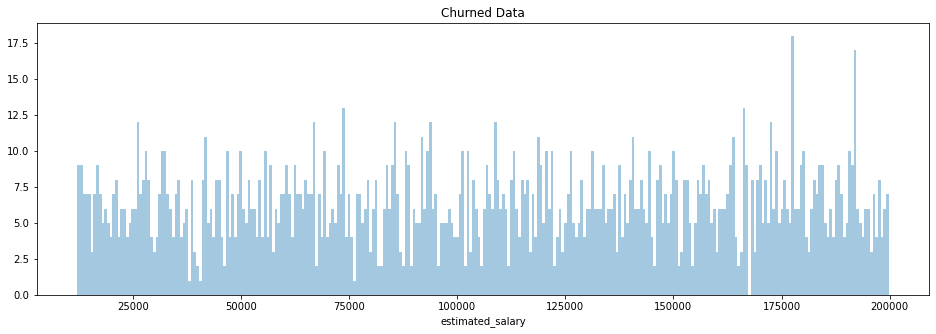

In [67]:
plt.figure(figsize=(16,5))
plt.title('Churned Data')
sns.distplot(df.loc[ df['exited'] == True , 'estimated_salary'], kde=False, bins=300);

In [68]:
print('Max Salary', df['estimated_salary'].max())

Max Salary 199992.48


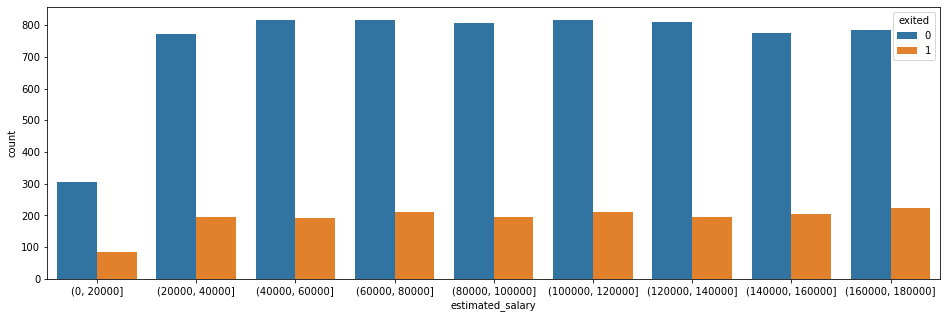

In [69]:
rounded_max_salary = 200000
ten_bins = int(rounded_max_salary/10)

salary_categories = pd.cut(churn_data['estimated_salary'], range(0, rounded_max_salary, ten_bins))

plt.figure(figsize=(16,5))
sns.countplot(salary_categories, hue=df.exited);

**_Does higher salary mean more revenue?_**

In [70]:
# HUMMM let's see what's happening here
pd.concat([df.estimated_salary, df.total_revenue], axis=1).corr()

,estimated_salary,total_revenue
estimated_salary,1.000000,0.670467
total_revenue,0.670467,1.000000


        Note that the tenure (how many years the customer was active before has churned)
        is a decisive fact here, because it's natural that the more years, the greater the 
        gain tends to be, since it's accumulative.

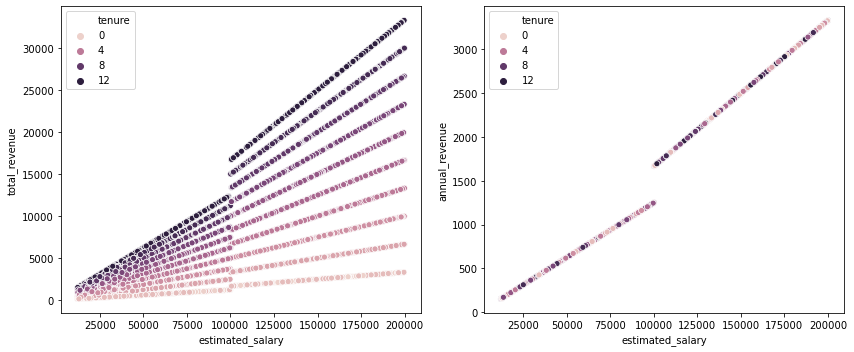

In [71]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x = 'estimated_salary', y='total_revenue', hue='tenure', data=df);
plt.subplot(1,2,2)
sns.scatterplot(x = 'estimated_salary', y='annual_revenue', hue='tenure', data=df)
plt.tight_layout()

#### _4. Customers who are active members have lower churn rate._
                
> **Yes!** 7% against 13%
>
> **A good reason to try to make customers active members. Besides, <br>
> those who are from active members group have a churn rate of 14%. <br>
> That means 14% of active members may churn, while for inactive group <br>
> that value grows to 27%.**

**_How much do TopBank earn from active members?_**

> It's expected for TopBank to earn about 1,550.00 EUR annually for each active member <br>
> **with 55% of revenue coming from active members.**

In [72]:
# Churn Rate by "activiness"
pd.DataFrame( df.groupby('is_active_member').sum().exited/ len(df) )

,exited
is_active_member,
0,0.130291
1,0.074240


        From Active and Inactive Groups
          Active Members Churn:    14.41%
          Inactive Members Churn:  26.86%

In [73]:
# Churn Rate inside each activiness group (active and inactive members)
pd.DataFrame( df.groupby('is_active_member').mean().exited )

,exited
is_active_member,
0,0.268699
1,0.144126


**_How much do we earn from active members?_**

In [74]:
# Usual annual revenue per active and inactive members
df.groupby('is_active_member').mean().annual_revenue.round(2) 

is_active_member
0    1669.84
1    1647.29
Name: annual_revenue, dtype: float64

In [75]:
# Percentage of active members 
(df.groupby('is_active_member').count().annual_revenue.round(2)[1]) / len(df)

0.5151031695383961

In [76]:
# Percentage of active members REVENUE 
(df.groupby('is_active_member').sum().annual_revenue.round(2)[1]) / df.annual_revenue.sum()

0.5117075616944781

        Let's calculate for considering only not churned customers, so we can know the effective gains.

In [77]:
aux = df[df['exited'] == False]
aux.groupby('is_active_member').mean().annual_revenue.round(2) 

is_active_member
0    1662.05
1    1645.46
Name: annual_revenue, dtype: float64

In [78]:
# Percentage of active members that hasn't churned
(aux.groupby('is_active_member').count().annual_revenue.round(2)[1]) / len(aux)

0.5542184784062041

In [79]:
# Percentage of inactive members that hasn't churned
(aux.groupby('is_active_member').count().annual_revenue.round(2)[0])  / len(aux)

0.44578152159379597

In [80]:
# Percentage of active members REVENUE that did not churn
(aux.groupby('is_active_member').sum().annual_revenue.round(2)[1]) / aux.annual_revenue.sum()

0.5517382044706981

In [81]:
# Percentage of active members REVENUE that did churn
(aux.groupby('is_active_member').sum().annual_revenue.round(2)[0]) / aux.annual_revenue.sum()

0.44826179589332876

#### _5. Customers who buy more products have lower churn rate._
                
> Yes, but the general churn rates of those are lower because there are many <br> 
> less customers who buy many products. Thus, after solving this imbalance <br>
> in data, we found out that: **If TopBank had the same amount of customers** <br>
> **buying from each "number of product" category... in the best case scenario** <br>
> **(5084 customers per category, meaning a total of 20336 customers), the churn** <br>
> **for each category would be around:**

        Number of Products    Churn Rate
                1                  7%
                2                  2%
                3                 20%
                4                 25%

> **Instead, if we analyze this situation under current circumstances (10,000 customers)** <br>
> **But looking into each category individually (if that category had 5084) the churn rate** <br>
> **would be:**

        Number of Products    Churn Rate
                1                 14%
                2                  4%
                3                 42%
                4                 50%
                
                
- **That tell us that if customers start buying more products, TopBank is going to lose many more customers.** 


- **Otherwise, if TopBank gains  more customers, its going to lose a lot more revenue, since customers who buy<br>
    more products are also going away much more.**
             
<br> 

**_Who brings us more revenue from those?_**

        Number of Products    Annual Revenue
                1               7893061.57
                2               7209487.63
                3                431995.61
                4                 99794.98

> Customers who buy 1 product. Mainly because there are more of them, but customers who <br>
> buy 2 products are the ones who may take the lead.

In [82]:
# Churn Rate by "number of product" category
pd.DataFrame( df.groupby('num_of_products').sum().exited/ len(df) )

,exited
num_of_products,
1,0.141140
2,0.035418
3,0.021910
4,0.006063


In [83]:
# Quantity of customers who has bought N products
pd.DataFrame( df.groupby('num_of_products').count().gender )

,gender
num_of_products,
1,4785
2,4312
3,248
4,57


As you can see, there's an imbalance in data, but before we deal with that...

**_From people who buy N products... what's their (internal) churn rate?_**

    Wow, everyone who has bought 4 products has churned.
    And 80% of people who buy 3 products stop buying.
    Let's see a graph representation...

In [84]:
pd.DataFrame( df.groupby('num_of_products').mean().exited.round(2) )

,exited
num_of_products,
1,0.28
2,0.08
3,0.83
4,1.00


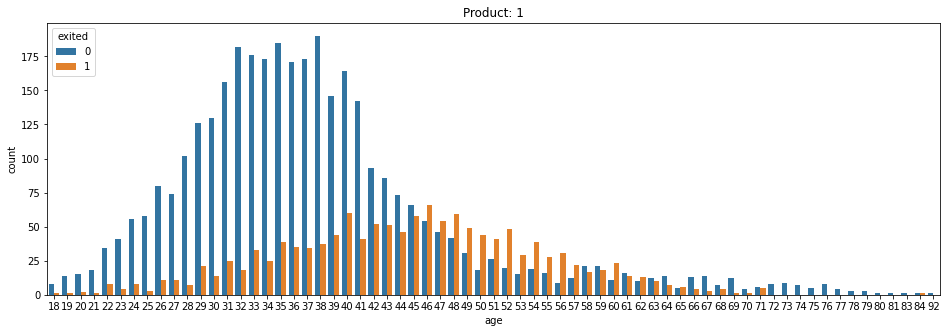

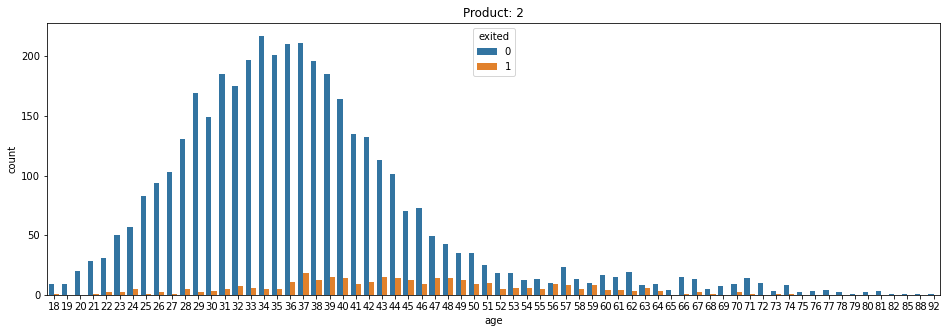

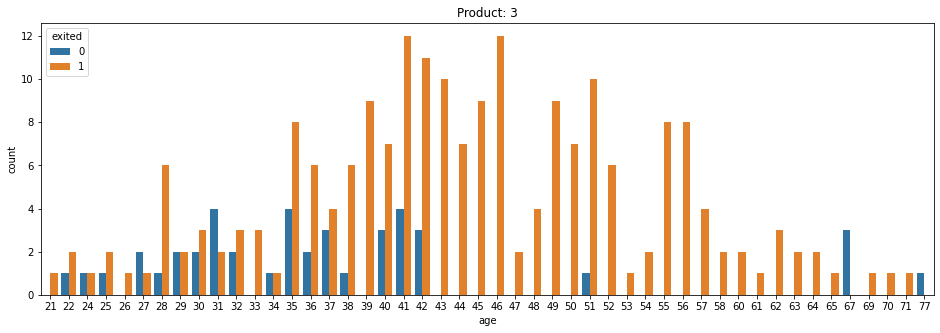

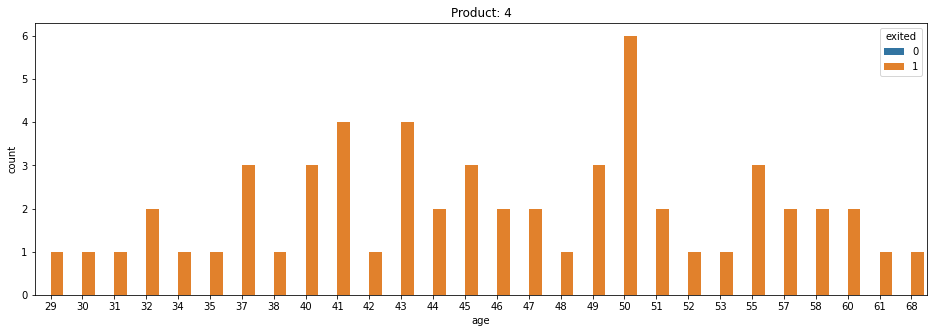

In [85]:
for products in range(1, 5):
    plt.figure(figsize=(16,5))
    sns.countplot( df.query(f"num_of_products == {products}")['age'], hue=df.exited )
    plt.title(f'Product: {products}')
    plt.show()

**_Dealing with imbalance in data_** to better evaluate the churn rate per "number of product" category

In [86]:
general_churn = pd.Series( df.groupby('num_of_products').sum().exited/ len(df), name='general_churn' )
churn_by_N_products = pd.Series( df.groupby('num_of_products').mean().exited, name='churn_into_category' )
number_of_products = pd.Series( df.groupby('num_of_products').count().gender, name='sales_quantity' )
number_of_churned_products = pd.Series( df.groupby('num_of_products').sum().exited,name='churned_quantity' )
products_churn = pd.concat([number_of_products, number_of_churned_products, general_churn, churn_by_N_products], axis=1)
products_churn

,sales_quantity,churned_quantity,general_churn,churn_into_category
num_of_products,,,,
1,4785,1327,0.141140,0.277325
2,4312,333,0.035418,0.077226
3,248,206,0.021910,0.830645
4,57,57,0.006063,1.000000


        To understand how I'll calculate this let's apply the formula manually and later we'll
        automate it (in case we need to use it on hundreds of categories).

                        For this explanation I'm going to be talking about 
                              "customers who buy 2 products" category.
                                       Let's call it "2Sales".

        Churn_into_category represents the percentage of customers from "2Sales" who has churned 
        from "2Sales". We have 10,000 customers, 4,590 of them belong to "2Sales" and 348 have 
        churned. Thus: 
        
                4,590/10,000 = general_churn and 348/4,590 = churn_into_category "2Sales"   
  
        So, If we multiply the internal churn (churn_into_category) by the number of customers
        into that category ("2Sales") we'll get the quantity of customers who has churned from
        that category. And using this information we can calculate a new general_churn based on
        "what if there were a different amout of customers in that category?" (instead of 4,590).

In [87]:
total_of_customers = len(df)
number_of_customer_for_category = 5084
internal_churn_rate = 0.277
number_of_customers_who_has_churned = (number_of_customer_for_category * internal_churn_rate)


print(f"                            total_of_customers   {total_of_customers}")
print(f"    number_of_customer_for_a_specific_category   {number_of_customer_for_category}")
print(f"number_of_customers_who_has_churned_from_there   {round(number_of_customers_who_has_churned)}")
print(f"                                 general_churn   {number_of_customers_who_has_churned/total_of_customers}")
print(f"                           internal_churn_rate   {internal_churn_rate}")
print()

print("Applying the formula to find out the general_churn rate based on the internal churn rate:")
print("(number_of_customer_for_category * internal_churn_rate) / total_of_customers\n")

print( (number_of_customer_for_category * internal_churn_rate) / total_of_customers )
print(round( (4590 * 0.08) / (len(df)) , 3))
print(round( (266 * 0.83) / (len(df))  , 3))
print(round( (60 * 1.00) / (len(df))   , 3))

                            total_of_customers   9402
    number_of_customer_for_a_specific_category   5084
number_of_customers_who_has_churned_from_there   1408
                                 general_churn   0.14978387577111255
                           internal_churn_rate   0.277

Applying the formula to find out the general_churn rate based on the internal churn rate:
(number_of_customer_for_category * internal_churn_rate) / total_of_customers

0.14978387577111255
0.039
0.023
0.006


**But what if (in the best case scenario) we had the same number of customers of our "best category" (with most customers)?**

In [88]:
number_of_categories = len(products_churn)
max_sales = 5084
rescaled_customers_quantity = number_of_categories * max_sales
print("Theoretical Total Customers: ", rescaled_customers_quantity)
# Churn rate:
print(round( (max_sales * 0.28)  / rescaled_customers_quantity ,3))
print(round( (max_sales * 0.08) /  rescaled_customers_quantity  , 3))
print(round( (max_sales * 0.83) /  rescaled_customers_quantity  , 3))
print(round( (max_sales * 1.00) /  rescaled_customers_quantity  , 3))

Theoretical Total Customers:  20336
0.07
0.02
0.207
0.25


**In a more realistic approach (total customers)**
    
    Yeah, same results.

In [93]:
len(df) / 4  # 4 categories (who buys 1, 2, 3 or 4 products)

2350.5

In [94]:
print(round( (2350.5 * 0.28)  / len(df)  ,3))
print(round( (2350.5 * 0.08) /  len(df)  , 3))
print(round( (2350.5 * 0.83) /  len(df)  , 3))
print(round( (2350.5 * 1.00) /  len(df)  , 3))

0.07
0.02
0.207
0.25


**However, what if we kept the original quantity of customers?**

In [95]:
print(round( (max_sales * 0.28)  / len(df)  ,3))
print(round( (max_sales * 0.08) /  len(df)  , 3))
print(round( (max_sales * 0.83) /  len(df)  , 3))
print(round( (max_sales * 1.00) /  len(df)  , 3))

0.151
0.043
0.449
0.541


**_Automation_**

_ps: changing the sales_quantity and customers_quantity we can create different scenarios._

In [96]:
expected_general_churn = [] 

# Same amount of customers under the actual circumstances (10,000 customers)
sales_quantity = len(df) / len(products_churn)
customers_quantity = len(df)

for product_quantity in products_churn.index.values:
    
    # Churn rate into that "category"
    churn_into_group = products_churn['churn_into_category'][product_quantity]
    
    # "gerenal_churn formula"
    theoretical_churn = (sales_quantity * churn_into_group) / (customers_quantity)
    expected_general_churn.append( theoretical_churn)

expected_general_churn = pd.Series(expected_general_churn, name='theoretical_general_churn', index=products_churn.index )
theoretical_product_churn = pd.concat([products_churn, expected_general_churn], axis=1).round(2)

> Here you can see, the churn rate for many products is lower, but people who buy many products are prone to churn. <br>
> So if TopBank had the same amount of customers buying from each "number of product" category... the churn rate <br>
> of those would be much higher.

In [97]:
def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)
    df.iloc[-1, -3] = df.iloc[-2, -3] = 'background-color: lightyellow'
    df.iloc[-1, -2] = df.iloc[-2, -2] = 'background-color: violet'
    df.iloc[-1, -1] = df.iloc[-2, -1] = 'background-color: #FFAAAA'
    return df

theoretical_product_churn.style.apply(style_specific_cell, axis=None).format("{:.2f}")

,sales_quantity,churned_quantity,general_churn,churn_into_category,theoretical_general_churn
num_of_products,,,,,
1,4785.00,1327.00,0.14,0.28,0.07
2,4312.00,333.00,0.04,0.08,0.02
3,248.00,206.00,0.02,0.83,0.21
4,57.00,57.00,0.01,1.00,0.25


**_Who brings us more revenue from those?_**

        Customers who buy only 1 product. In reality, that happens because there're more
        observations of that type (again, imbalanced data).

        But as the difference between customers quantity of 2 and 3 num_of_products  
        are huge... and also, the maximum revenues are quite similar among all of 
        them (we would expect that more products would cost more, well, not here).
        let's work with only 1 and 2 num_of_products.

In [98]:
pd.DataFrame( df.groupby('num_of_products').sum().annual_revenue ).round(2)

,annual_revenue
num_of_products,
1,7870633.07
2,7190126.39
3,430345.91
4,99518.12


    
        The customers count of "1" and "2" are not too far away. Therefore, thinking
        about the possibility of gaining more customers means that those quantities
        are going to be equals or even "2" may surpass "1", let's use the theory from
        before and (imagining that the company wants to attract more customers and
        wants them to buy more products, but since "3" and "4" tends to happen less...) 
        "what if they were in equal quantities?".

In [99]:
def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)
    df.iloc[:, 0] = 'background-color: lightyellow'
    df.iloc[0, 1] = df.iloc[1, 1] = 'background-color: violet'
    df.iloc[:, -1] = 'background-color: lightblue'
    return df

described_num_of_products = pd.DataFrame( df.groupby('num_of_products').describe().annual_revenue )
described_num_of_products.style.apply(style_specific_cell, axis=None).format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
num_of_products,,,,,,,,
1,4785.00,1644.86,983.67,151.25,746.85,1746.17,2521.84,3332.85
2,4312.00,1667.47,987.98,150.21,733.51,1763.04,2553.85,3333.21
3,248.00,1735.27,944.45,187.99,893.67,1765.24,2598.68,3322.62
4,57.00,1745.93,980.62,170.18,943.49,1918.61,2383.46,3314.58


        Yeah, than the revenue of "2" products would be higher than "1"'s.

In [100]:
( described_num_of_products['mean'] * (len(df) / len(described_num_of_products)) ).round()

num_of_products
1    3866233.0
2    3919386.0
3    4078742.0
4    4103813.0
Name: mean, dtype: float64

#### _6. "Older" customers have lower churn rate._
                
> Yes. The sum, mean and median of churn rates from higher <br>
> tenures are lower than the churn rates from lower tenures.

**_The longer that time, greater is the revenue?_**

> Of course, what a silly question I made hahah <br>
> **Actually, the annual gains are pretty similar, <br>
> so in the long term, yes, the accumulated value <br>
> increases, but that doesn't mean the customer <br>
> buys more products or spends more money on <br>
> the company.**

In [101]:
# The mean tells us the churn rate into each group so let's use it.
churn_by_tenure = df.groupby("tenure").exited.describe()
churn_by_tenure

,count,mean,std,min,25%,50%,75%,max
tenure,,,,,,,,
0,387.0,0.219638,0.414537,0.0,0.0,0.0,0.0,1.0
1,970.0,0.227835,0.419652,0.0,0.0,0.0,0.0,1.0
2,979.0,0.194076,0.395690,0.0,0.0,0.0,0.0,1.0
3,942.0,0.213376,0.409908,0.0,0.0,0.0,0.0,1.0
4,925.0,0.206486,0.405003,0.0,0.0,0.0,0.0,1.0
5,956.0,0.199791,0.400052,0.0,0.0,0.0,0.0,1.0
6,918.0,0.202614,0.402167,0.0,0.0,0.0,0.0,1.0
7,962.0,0.177755,0.382505,0.0,0.0,0.0,0.0,1.0
8,965.0,0.195855,0.397063,0.0,0.0,0.0,0.0,1.0


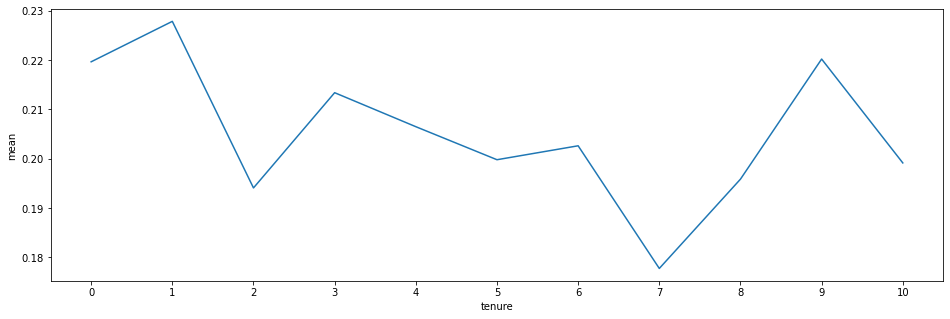

In [102]:
plt.figure(figsize=(16,5))
sns.lineplot( churn_by_tenure.index , churn_by_tenure['mean'] );
plt.xticks(churn_by_tenure.index);

In [103]:
def get_members_churn(data, is_active):
    member_churn = {
        'tenure': [],
        'total_customers': [],
        'churned_customers': [],
        'churn_rate': []
    }

    for tenure in data['tenure'].unique():
        churned_data = data[data['tenure'] == tenure]

        total_customers = len(churned_data)
        churned_customers = len(churned_data[(churned_data['exited'] == True) & (churned_data['is_active_member']==is_active)])
        churn_rate = churned_customers/total_customers

        member_churn['tenure'].append(tenure)
        member_churn['total_customers'].append(total_customers)
        member_churn['churned_customers'].append(churned_customers)
        member_churn['churn_rate'].append(churn_rate)
    
    return pd.DataFrame(member_churn)

In [104]:
active_member_churn = get_members_churn(churn_data, is_active=True)
inactive_member_churn = get_members_churn(churn_data, is_active=False)

**Inactive Customers have higher churn rate.**

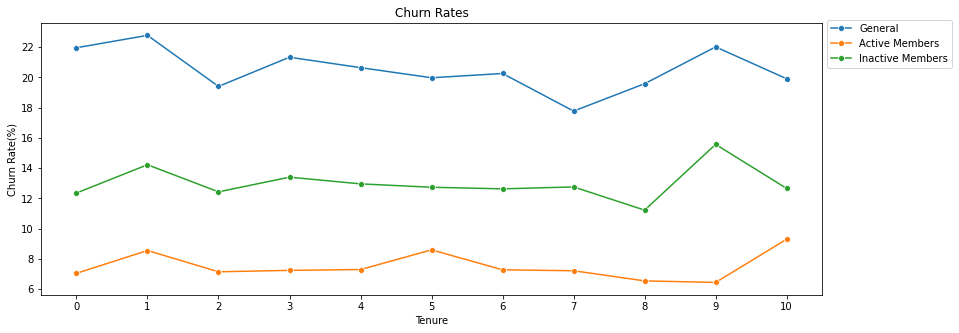

In [105]:
plt.figure(figsize=(14,5))
sns.lineplot(churn_by_tenure.index, churn_by_tenure['mean']*100, label='General', marker='o')
sns.lineplot(churn_by_tenure.index, active_member_churn['churn_rate']*100, label='Active Members', marker='o')
sns.lineplot(churn_by_tenure.index, inactive_member_churn['churn_rate']*100, label='Inactive Members', marker='o')
#sns.lineplot(general_churn_stats['years_ago'], mean_churn, label='Mean Churn', color='red')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xticks(churn_by_tenure.index);
plt.title("Churn Rates");  plt.xlabel("Tenure"); plt.ylabel("Churn Rate(%)")
plt.show()

The sum, mean and median of churn rates from higher tenures are lower than the churn rates from lower tenures.

In [107]:
print( churn_by_tenure.loc[churn_by_tenure.index >= 5, 'mean'].sum() )
print( churn_by_tenure.loc[churn_by_tenure.index >= 5, 'mean'].mean() )
print( churn_by_tenure.loc[churn_by_tenure.index >= 5, 'mean'].median() )

1.1953515835433592
0.1992252639238932
0.1994671319649145


In [108]:
print( churn_by_tenure.loc[churn_by_tenure.index <= 5, 'mean'].sum() )
print( churn_by_tenure.loc[churn_by_tenure.index <= 5, 'mean'].mean() )
print( churn_by_tenure.loc[churn_by_tenure.index <= 5, 'mean'].median() )

1.261201959418373
0.21020032656972884
0.20993114133241522


    Average churn rates according to tenures
    
      General Churn Rate:        20.51%
          Active Members Churn:    7.51%
          Inactive Members Churn:  12.99%

In [109]:
churn_by_tenure['mean'].mean() * 100

20.51602498166048

In [110]:
active_member_churn['churn_rate'].mean() * 100

7.517214998215177

In [111]:
inactive_member_churn['churn_rate'].mean() * 100

12.998809983445298

**_The longer that time, greater is the revenue?_**

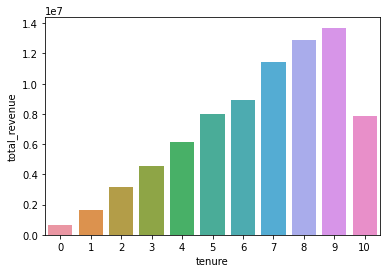

In [112]:
total_revenue_by_tenure = df.groupby("tenure").total_revenue.sum().round(2)
sns.barplot(total_revenue_by_tenure.index, total_revenue_by_tenure);

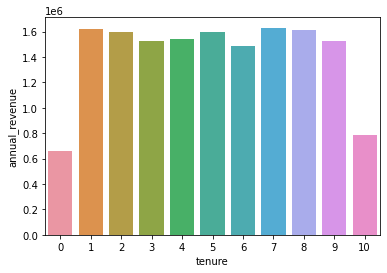

In [113]:
annual_revenue_by_tenure = df.groupby("tenure").annual_revenue.sum().round(2)
sns.barplot(annual_revenue_by_tenure.index, annual_revenue_by_tenure);

    Greater values came from 7, 1, 8, 2... big tenure, small tenure, big tenure, small tenure... not really a time relation


In [114]:
annual_revenue_by_tenure.sort_values(ascending=False)

tenure
7     1630328.99
1     1623070.31
8     1614273.39
2     1597369.71
5     1596826.81
4     1542403.79
3     1526090.31
9     1522853.49
6     1488741.32
10     786508.55
0      662156.82
Name: annual_revenue, dtype: float64

#### _7. Customers with credit card have a lower churn rate._
                
> No, and also, **the rates within the groups are quite equals  <br>
> and also, as there are more customers with credit card, that is a bad sign<br>
> because it means TopBank is losing many good customers.**

**_Are they the most responsible for revenue?_**

        "Most of customers have credit card, and if customers with credit card bring higher 
         revenue also there's a high chance we're losing a good customers when they churn".

> Yes, but again, **imbalance in data, 70% of customers has credit card. So, <br>
> after dealing with that, it seems that customers with no credit card are <br>
> the responsible ones.**

In [115]:
df.groupby("has_cr_card").exited.describe()

,count,mean,std,min,25%,50%,75%,max
has_cr_card,,,,,,,,
0,2742.0,0.207513,0.405600,0.0,0.0,0.0,0.0,1.0
1,6660.0,0.203303,0.402487,0.0,0.0,0.0,0.0,1.0


In [116]:
# Churned customers without credit card
len(df[(df['has_cr_card'] == False) & (df['exited'] == True)])

569

In [117]:
# Churned customers with credit card
len(df[(df['has_cr_card'] == True) & (df['exited'] == True)])

1354

In [118]:
print('  General Churn Rate')
print(f"No Credit Card {613/10000}")
print(f"Credit Card    {1424/10000}")

  General Churn Rate
No Credit Card 0.0613
Credit Card    0.1424


In [119]:
print('  Categorical Churn Rate')
print(f"No Credit Card {613/2945}")
print(f"Credit Card    {1424/7055}")

  Categorical Churn Rate
No Credit Card 0.20814940577249574
Credit Card    0.20184266477675408


**_Are they the most responsible for revenue?_**

In [120]:
df.groupby("has_cr_card").annual_revenue.sum().round(2)

has_cr_card
0     4638171.33
1    10952452.16
Name: annual_revenue, dtype: float64

In [121]:
df.groupby("has_cr_card").total_revenue.sum().round(2)

has_cr_card
0    22957768.12
1    56083923.43
Name: total_revenue, dtype: float64

In [122]:
df.groupby("has_cr_card").annual_revenue.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
has_cr_card,,,,,,,,
0,2742.0,1691.53,978.75,150.61,780.20,1806.06,2562.89,3333.21
1,6660.0,1644.51,986.79,150.21,729.12,1737.20,2531.33,3332.85


In [123]:
customer_quantity = 5000

In [124]:
# No Credit Card
print("Rescaled value by:\n    mean        median")
print(f"{customer_quantity * 1580.17}   {customer_quantity * 1693.62}")

Rescaled value by:
    mean        median
7900850.0   8468100.0


In [125]:
# Credit Card
print("Rescaled value by:\n    mean        median")
print(f"{customer_quantity * 1556.45}    {customer_quantity * 1242.48}")

Rescaled value by:
    mean        median
7782250.0    6212400.0


#### _8. Customers with higher credit score have lower churn rate._
                
> Yes, though it's a tiny difference.

**_Does a higher credit score mean more revenue?_**

> No, it doesn't.

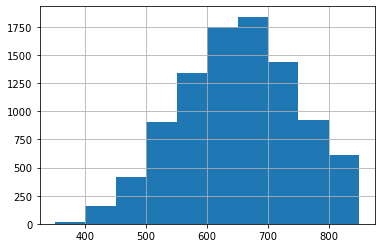

In [126]:
df['credit_score'].hist();

In [127]:
# Churn Rate for Credit Score above the mean
df.loc[df['credit_score'] > df['credit_score'].median(), 'exited'].sum() / len(df)

0.09625611572005956

In [128]:
# Churn Rate for Credit Score below the mean
df.loc[df['credit_score'] < df['credit_score'].median(), 'exited'].sum() / len(df)

0.1074239523505637

**_Does a higher credit score mean more revenue?_**

        Nope, if that so, we would see the color getting darker from left to right.

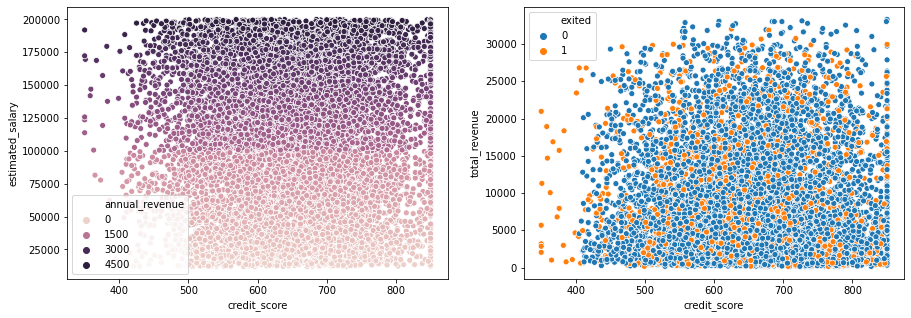

In [129]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='credit_score', y='estimated_salary', hue='annual_revenue', data=df);
plt.subplot(1, 2, 2)
sns.scatterplot(x='credit_score', y='total_revenue', hue='exited', data=df);

In [130]:
cut_credit_score = pd.Series(pd.cut(df['credit_score'], 10), name='credit_score_category')
df = pd.concat([df, cut_credit_score], axis=1)

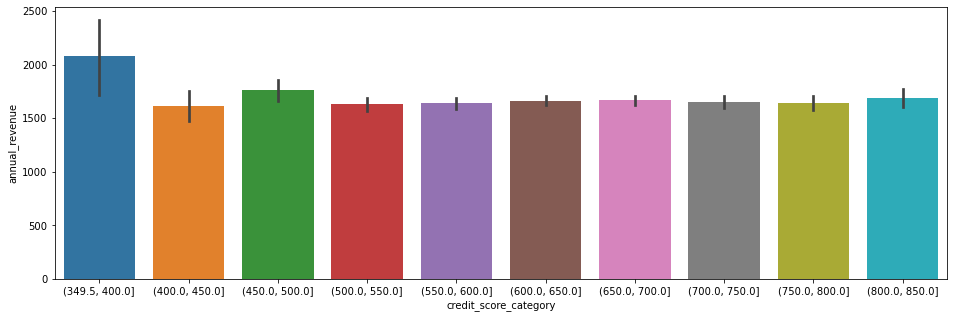

In [131]:
plt.figure(figsize=(16,5))
sns.barplot(x='credit_score_category', y='annual_revenue', data=df);

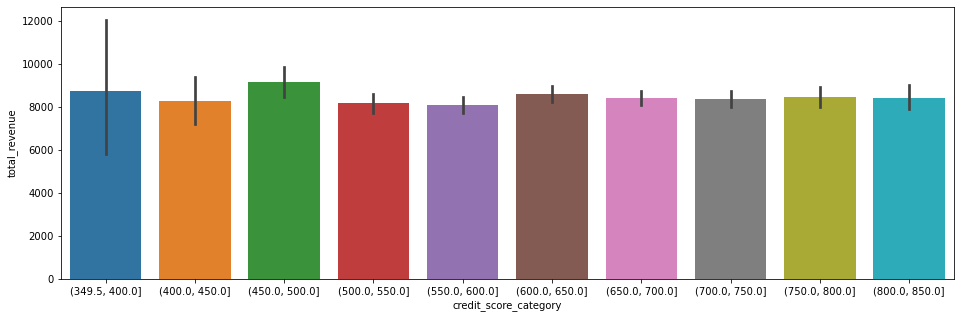

In [132]:
plt.figure(figsize=(16,5))
sns.barplot(x='credit_score_category', y='total_revenue', data=df);

In [133]:
df.groupby('credit_score_category').annual_revenue.describe()

,count,mean,std,min,25%,50%,75%,max
credit_score_category,,,,,,,,
"(349.5, 400.0]",19.0,2077.907632,821.424042,217.207125,1786.760750,2295.033500,2717.920167,3199.558167
"(400.0, 450.0]",158.0,1615.816330,955.924967,150.634625,808.740813,1218.230250,2525.117333,3314.575333
"(450.0, 500.0]",422.0,1762.168710,993.867652,155.505500,870.908719,1863.051917,2721.374167,3325.092167
"(500.0, 550.0]",924.0,1629.101788,965.136165,150.209875,730.015344,1739.355167,2458.840667,3331.045833
"(550.0, 600.0]",1342.0,1636.906380,978.915652,150.842375,752.407719,1730.738583,2487.298917,3332.152833
"(600.0, 650.0]",1759.0,1663.947403,983.237955,151.207625,731.175750,1770.034500,2541.373333,3332.845667
"(650.0, 700.0]",1837.0,1664.516518,987.115904,150.608375,735.041000,1762.666833,2556.228500,3333.208000
"(700.0, 750.0]",1436.0,1647.870115,981.545549,151.150375,748.368313,1754.743333,2504.745667,3330.957833
"(750.0, 800.0]",905.0,1642.353185,989.500772,164.780375,758.580000,1726.727500,2535.895667,3328.795333


In [116]:
# mean and median

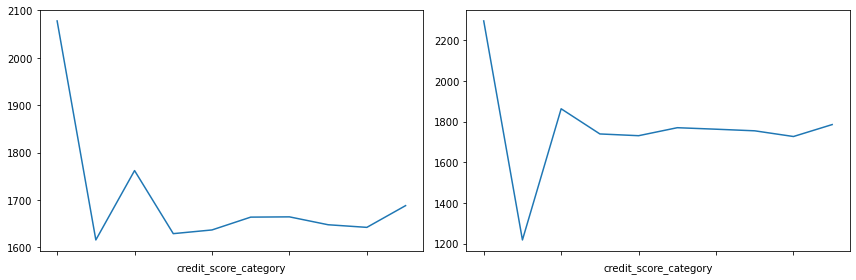

In [134]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
(df.groupby('credit_score_category').annual_revenue.mean()).plot()
plt.subplot(1, 2, 2)
(df.groupby('credit_score_category').annual_revenue.median()).plot()
plt.tight_layout()

### _Geography hypotheses._

    Which country does the biggest revenue come from?
    
> France, and one more time: imbalanced data, half of customers are located there. <br>
> **Balancing the data, Germany seems to be the right place to invest on.** Even because <br>
> (as we've seen before) there are high quality customers churning from there.


In [135]:
df.groupby('geography').annual_revenue.sum().round(2)

geography
France     7795394.48
Germany    3962222.46
Spain      3833006.54
Name: annual_revenue, dtype: float64

In [136]:
df.groupby('geography').annual_revenue.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
geography,,,,,,,,
France,4716.0,1652.97,982.35,150.63,753.68,1750.16,2535.22,3332.15
Germany,2359.0,1679.62,996.86,151.25,731.70,1779.99,2594.29,3332.85
Spain,2327.0,1647.19,976.84,150.21,745.61,1747.54,2507.84,3333.21


In [137]:
(df.groupby('geography').annual_revenue.describe()[['mean','50%']]*5000).round(2)

,mean,50%
geography,,
France,8264837.24,8750822.50
Germany,8398097.63,8899957.50
Spain,8235940.14,8737716.67


#### _1. Country that has more customers on "active members group" has lower churn rate._
                
> Yes. Not in a general churn rate calculus, but looking at regions <br>
> as individual environments, France has lower churn rate, followed <br>
> by Spain and then Germany. However, the difference is not large <br>
> enough for us to make affirmations.
>
> We can see, though... that active customers have lower churn rate. <br>
> So, **action plans that focus on making the customers more active may <br>
> bring good results.**

In [138]:
# Does France has lower churn rate? Let's check!
customers_quantity = pd.Series( df.groupby(['geography']).is_active_member.count(), name='customers_quantity' )
active_quantity =  pd.Series( df.groupby(['geography']).is_active_member.sum(), name='active_quantity' )
churned_quantity =  pd.Series( df.groupby(['geography']).exited.sum(), name='churned_quantity' )
general_churn = pd.Series( df.groupby(['geography']).exited.sum() / len(df), name='general_churn' )
churn_into = pd.Series( df.groupby(['geography']).exited.mean(), name='churn_into_country' )

country_churn = pd.concat([customers_quantity, active_quantity, churned_quantity, general_churn, churn_into], axis=1)
country_churn

,customers_quantity,active_quantity,churned_quantity,general_churn,churn_into_country
geography,,,,,
France,4716,2437,775,0.082429,0.164334
Germany,2359,1178,758,0.080621,0.321323
Spain,2327,1228,390,0.041481,0.167598


In [139]:
# Germany churn rates keeps insane...
pd.DataFrame( df.groupby(['geography','is_active_member']).exited.mean()*100 ).round(2)

exited
geography is_active_member        
France    0                  21.46
          1                  11.74
Germany   0                  40.64
          1                  23.60
Spain     0                  23.29
          1                  10.91

#### _2. Country with higher average credit score has lower churn rate._
                
> Negative! Germany has the higher churn rate, mainly if we <br>
> look at it as an individual environment.

In [140]:
df.groupby(['geography']).credit_score.mean()

geography
France     649.677057
Germany    652.037304
Spain      651.654920
Name: credit_score, dtype: float64

#### _3. Country with higher sum of balances have lower churn rate._
                
> Yes.

In [141]:
df.groupby(['geography']).balance.sum().round(1)

geography
France     295655591.3
Germany    282680842.7
Spain      144862381.7
Name: balance, dtype: float64

#### _4. Country with higher average balance have lower churn rate._
                
> False.

In [142]:
df.groupby(['geography']).balance.mean()

geography
France      62692.025293
Germany    119830.793853
Spain       62252.849880
Name: balance, dtype: float64

#### _5. Country with higher average salary has lower churn rate._
                
> False

In [143]:
df.groupby(['geography']).estimated_salary.mean()

geography
France     105854.971376
Germany    107171.343976
Spain      105447.292230
Name: estimated_salary, dtype: float64

Germany really seems to have high quality customers. So the fact that it has a churn rate too high is really sad. Probably We'll have to create a specific action plan for it.

#### _6. Country with more credit card customers has lower churn rate._
                
> True

        70% of customers has credit card even in each country.

In [144]:
df.groupby(['geography']).has_cr_card.sum()

geography
France     3338
Germany    1699
Spain      1623
Name: has_cr_card, dtype: int64

In [145]:
df.groupby(['geography']).has_cr_card.sum() / country_churn['customers_quantity']

geography
France     0.707803
Germany    0.720220
Spain      0.697465
dtype: float64

**Final thoughts: How much Money has TopBank lost?**

    Let's do a little experiment: We know the revenue TopBank gains each year. Then, let's consider 
    that this year We have only the customers who has not churned (no new customers, no new churned).
    How much money would we lose (knowing that we have the actual revenue for each customer)?

In [146]:
# Not churned customers sum of revenues
gained_revenue = round( df.loc[ df['exited'] == False, 'annual_revenue'].sum(), 2)

# Churned customers sum of revenues
lost_revenue = round( df.loc[ df['exited'] == True, 'annual_revenue'].sum(), 2)

print(f"How much we really gained (7963 not churned customers): {gained_revenue}")
print(f"How much we have lost (2037 churned customers):          {lost_revenue}")

How much we really gained (7963 not churned customers): 12361719.72
How much we have lost (2037 churned customers):          3228903.77


> **How much we really gained:** _12 million_ <br>
> **How much we have lost:** _3 million_


    Now, considering that same situation, but in a more... predictive approach. How much money would we lose?

In [147]:
print('Not Churned quantity ', len(df.loc[ df['exited'] == False]))
print('Churned quantity     ', len(df.loc[ df['exited'] == True]))

Not Churned quantity  7479
Churned quantity      1923


In [148]:
number_of_customers = len(df)

# Not churned customers sum of revenues
total_revenue = round(df.loc[ df['exited'] == False, 'annual_revenue'].sum(), 2)

# Mean revenue from Not churned customers
expected_revenue_per_customer = round( df.loc[ df['exited'] == False, 'annual_revenue'].mean(), 2)

# Revenue if we had 10,000 customers
expected_revenue = expected_revenue_per_customer * number_of_customers
print(f"How much we expected to gain (10,000 customers):   {expected_revenue}")

# Revenue from the actual 7,963 not churned customers
print(f"How much we really gained (7963 not churned):      {total_revenue}")

result = expected_revenue - total_revenue
print(f'How much we would lose (2037 churned customers):    {result.round(2)}')

How much we expected to gain (10,000 customers):   15540189.719999999
How much we really gained (7963 not churned):      12361719.72
How much we would lose (2037 churned customers):    3178470.0


Again, similar result, but this time we confirmed we would've gained about 16 million EUR.

> **How much we expected to gain:** _15.5 millions_ <br>
> **How much we really gained:**    _12 millions_ <br>
> **How much we have lost:**        _3 millions_ <br>

In [154]:
# Saving the progress
# df.to_pickle("churn_data_Modeling.pkl")
# df = pd.read_pickle("churn_data_Modeling.pkl")

### 5.3 Multivariate Analysis

In [149]:
numerical_attributes = churn_data.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = churn_data.select_dtypes( exclude=['int64', 'float64'] )

#### 5.3.1. Numerical Attributes

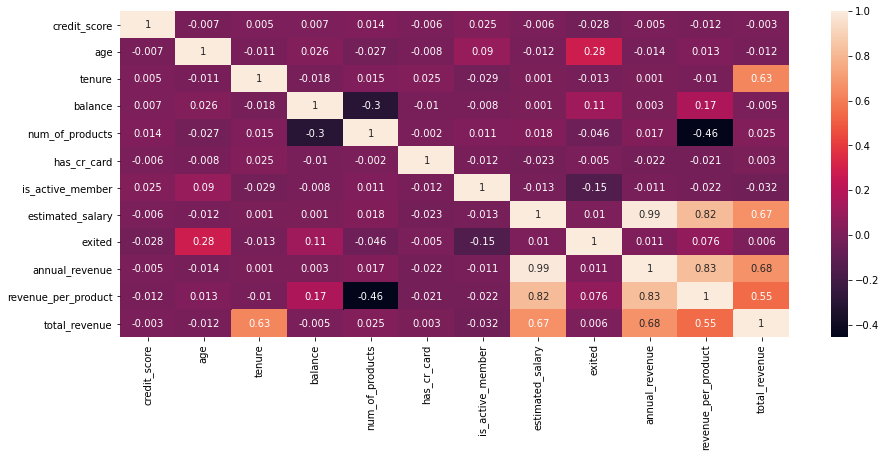

In [150]:
plt.figure(figsize=(15, 6))
sns.heatmap(numerical_attributes.corr().round(3), annot=True )
plt.show()

#### 5.3.2. Categorical Attributes

[Cramer's v](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

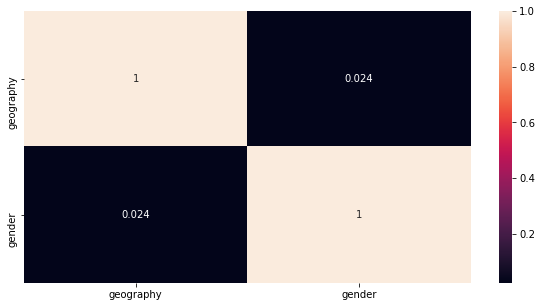

In [155]:
categorical_corr = get_categorical_corr(categorical_attributes)
plt.figure(figsize=(10, 5))
sns.heatmap( categorical_corr, annot=True )
plt.show()

## Some _"3. Insights and some Highlights" readme section_ validations.

**20% of customers are in churn.**

- Hypothesis 1. Younger customers have higher churn rate.

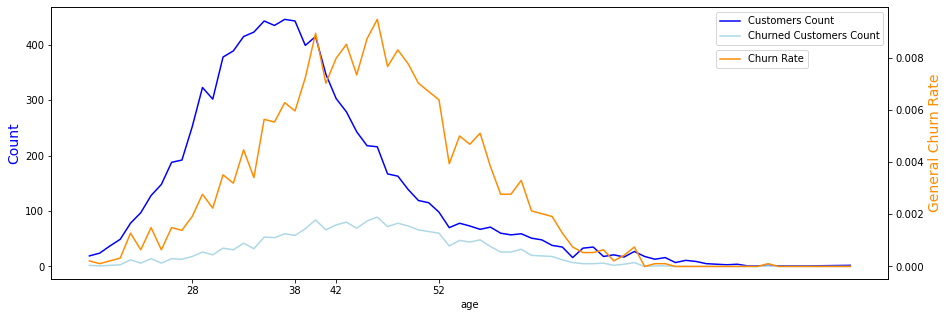

In [156]:
# 0_age_churn_rate
plt.figure(figsize=(15,5))
plt.xticks([28, 38, 42, 52]) 

ax = df.groupby('age').exited.count().plot(color='blue', label='Customers Count')
ax.legend()
plt.ylabel('Count', color='b', fontsize=14)
ax.twinx()

ax1 = df.groupby('age').exited.sum().plot(color='lightblue', ax=ax, label='Churned Customers Count')
ax1.legend()

ax2 = ( df.groupby('age').exited.sum() / len(df) ).plot(color='darkorange', label='Churn Rate')
ax2.legend(bbox_to_anchor=(0.91, 0.86))
plt.ylabel('General Churn Rate', color='darkorange', fontsize=14)

plt.show()

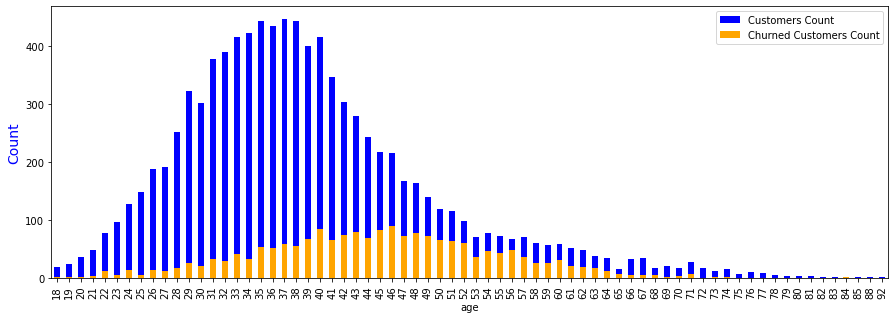

In [157]:
plt.figure(figsize=(15,5))
plt.xticks([28, 38, 42, 52]) 

ax = df.groupby('age').exited.count().plot(kind='bar',color='blue', label='Customers Count')
ax.legend()
plt.ylabel('Count', color='b', fontsize=14)

ax1 = df.groupby('age').exited.sum().plot(kind='bar',color='orange', ax=ax, label='Churned Customers Count')
ax1.legend()

plt.show()

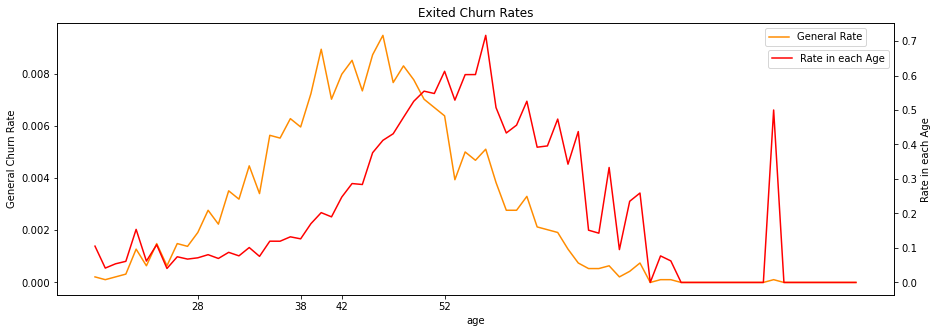

In [158]:
plt.figure(figsize=(15,5))
ax = (df.groupby('age').exited.sum() / len(df)).plot(color='darkorange', label='General Rate')
ax.legend(bbox_to_anchor=(0.973, 1))
plt.ylabel('General Churn Rate')
ax.twinx()

ax1 = df.groupby('age').exited.mean().plot(color='r', label='Rate in each Age')
ax1.legend(bbox_to_anchor=(1., 0.92))
plt.ylabel('Rate in each Age')

plt.title('Exited Churn Rates')
plt.xticks([28, 38, 42, 52])
plt.show()

In [159]:
annual_revenue = df.annual_revenue.sum()  
annual_revenue * .046 # Ages between 38 to 43 represent 4.6% of annual revenue

717168.6804173333

- Hypothesis 4. Customers who are active members have lower churn rate.
    
    Active members revenue

In [160]:
active_members_total_revenue = annual_revenue * .55 # 55% of revenue coming from active members.
active_members_total_revenue

8574842.918033333

In [161]:
lost_revenue_from_active_members = active_members_total_revenue * .14  # 14% of active members may churn
lost_revenue_from_active_members

1200478.0085246668

In [162]:
lost_revenue_from_active_members / annual_revenue 

0.07700000000000001

    Inactive members revenue

In [163]:
inactive_members_total_revenue = annual_revenue * .45 # 45% of revenue coming from active members.
inactive_members_total_revenue

7015780.5693

In [164]:
lost_revenue_from_inactive_members = inactive_members_total_revenue * .27  # 27% of active members may churn
lost_revenue_from_inactive_members

1894260.753711

In [165]:
lost_revenue_from_inactive_members / annual_revenue 

0.12150000000000001

- Hypothesis 5. Customers who buy more products have lower churn rate.

    which "product" bring us more revenue?

In [166]:
pd.DataFrame( df.groupby('num_of_products').sum().annual_revenue ) / df.annual_revenue.sum()

,annual_revenue
num_of_products,
1,0.504831
2,0.461183
3,0.027603
4,0.006383


- Hypothesis 6. "Older" customers have lower churn rate.

    The longer that time, greater is the revenue?

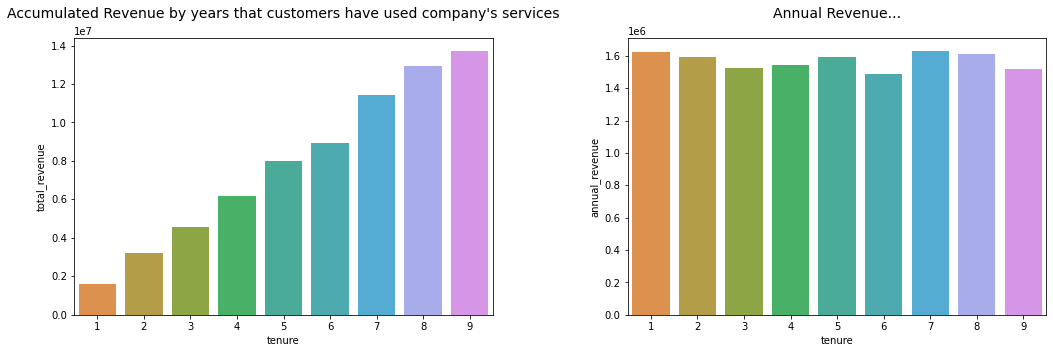

In [167]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title("Accumulated Revenue by years that customers have used company's services", size=14).set_position([.5, 1.05])
sns.barplot(total_revenue_by_tenure.index, total_revenue_by_tenure);
plt.xlim(0.5, 9.5);

plt.subplot(1, 2, 2)
plt.title("Annual Revenue...", size=14).set_position([.5, 1.05])
sns.barplot(annual_revenue_by_tenure.index, annual_revenue_by_tenure);
plt.xlim(0.5, 9.5);
plt.tight_layout()

- Geography hypotheses.

    Which country does the biggest revenue come from?
    

In [168]:
df.groupby('geography').annual_revenue.sum() / df.annual_revenue.sum()

geography
France     0.500005
Germany    0.254141
Spain      0.245853
Name: annual_revenue, dtype: float64